# CS767 Assignment 1
## Weather Prediction Models
*Alessandro Allegranzi 5/15/2024*

Building decision tree models to predict temperate, expected rainfall, and expected snowfall for a specific day in a year in Boston, MA.

In [1]:
# The below code was taken from the included project template. I added some other
# imports, like csv, that are needed.

# INTENT: System, graphics, file locations prepared AND save_fig() defined

# Implementation of A. Geron, edited by Eric Braude

# Python ≥3.5 is required
import sys  #  constants, functions etc. of the Python interpreter
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split
from sklearn import tree

# Common imports
import csv
import pandas as pd
import numpy as np
import os # functions for interacting portably with OS, e.g., file system

# With respect to randomness, this notebook's output will be same across runs
np.random.seed(42) # "42" is arbitrary (but unchanging)

# mpl is prepared to plot pretty figures inline (for notebook format)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Constants for where to save the figures
IMAGES_PATH = "/content/drive/MyDrive/Colab Notebooks/images"


## Parts 1-3 Intent: Training a regression tree model to predict temperature on a given day. We are looking for a predicted value, so went with a regression model over classification as it is more appropriate.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Data sourced from NOAA: https://www.ncei.noaa.gov/cdo-web/
input_file = "/content/drive/MyDrive/Colab Notebooks/data/boston_weather_data.csv"

weather_data = pd.read_csv(input_file)

# Uncomment to see info on data frame
# weather_data.info()

# Training on a date is difficult because models work best with numerical inputs and
# working with datetime is not straightforward. I decided to convert datetime into
# the day of the year.
weather_data['DATE'] = pd.to_datetime(weather_data['DATE'])
weather_data['DayOfYear'] = weather_data['DATE'].dt.dayofyear

# I got nan errors for values in y, so cleaning the data.
weather_data = weather_data.fillna(method='ffill')

# Separate features and target
features = ['DayOfYear']
X = weather_data[features]
y = weather_data['TAVG']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model. Max Depth 3 seems like a good depth to easily visualize
# the tree and not overfit
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

# Test the model
predictions = tree_reg.predict(X_test)

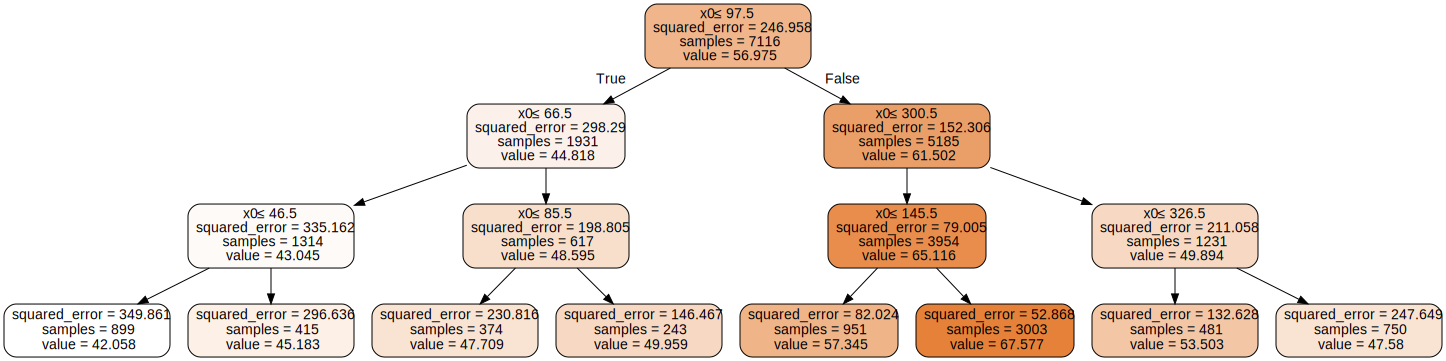

In [3]:
# Also used the assignment notes as a starter.

from graphviz import Source # "Graphical visualization"
from sklearn.tree import export_graphviz

weather_data

dot_data = export_graphviz(tree_reg, out_file=os.path.join(IMAGES_PATH, "weather_model.dot"),
                           filled=True, rounded=True,
                           special_characters=True)

# Use graphviz to visualize the tree
Source.from_file(os.path.join(IMAGES_PATH, "weather_model.dot"))

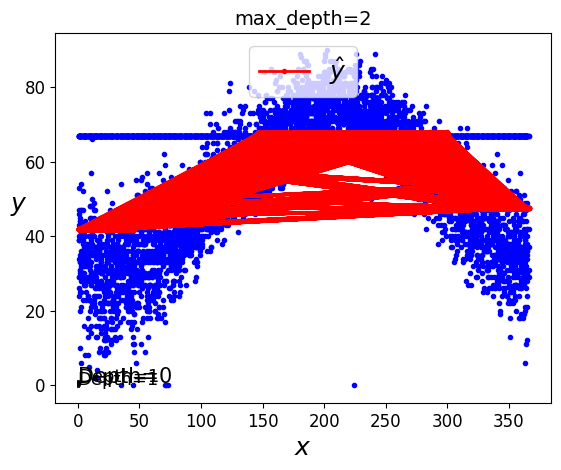

In [4]:
predictions = tree_reg.predict(X_train)

plt.plot(X_train, y_train, "b.")
plt.plot(X_train, predictions, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("Temperature Decision Tree Regression", fontsize=14)

for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.show()

### Testing the predicetd value.

In [5]:
from datetime import datetime

# Convert date to day of the year so our model can work with
date = datetime.strptime('2025-07-01', '%Y-%m-%d')
day_of_year = date.timetuple().tm_yday

# Create a DataFrame for the prediction
X_pred = pd.DataFrame([day_of_year], columns=features)

# Predict temperature
temperature = tree_reg.predict(X_pred)
print(f'The predicted temperature for July 1 is {temperature[0]}')

The predicted temperature for July 1 is 67.57708957708958


## Intent: Training a regression tree model to predict likelihood of rainfall on a given day. Still using a regression model, but this time training on two features: day of the year and average temperature.

In [14]:
# Separate features and target
features = ['DayOfYear', 'TAVG']
X = weather_data[features]
y = weather_data['PRCP']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rain_tree_reg = DecisionTreeRegressor(max_depth=3)
rain_tree_reg.fit(X_train, y_train)

# Test the model
predictions = rain_tree_reg.predict(X_test)

# Uncomment to examine predicitons
# predictions

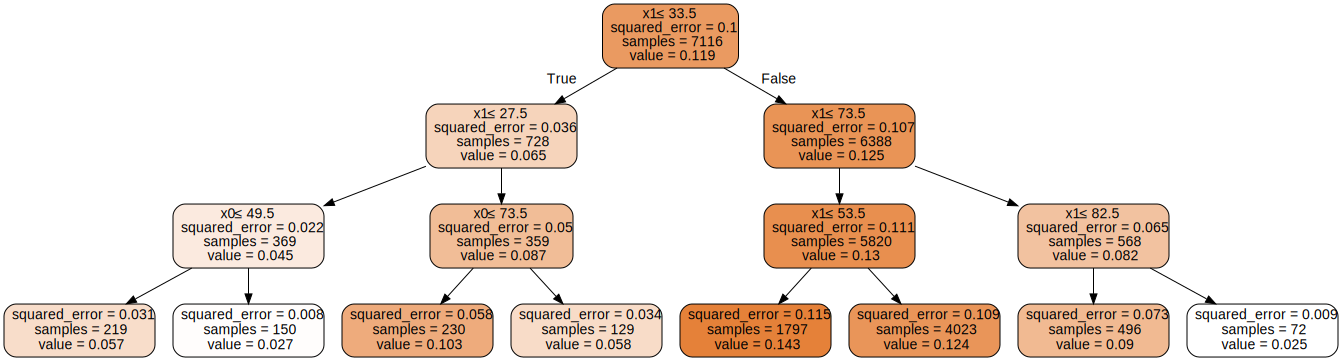

In [7]:
# Visualizing rainfall regression tree.

weather_data

dot_data = export_graphviz(rain_tree_reg, out_file=os.path.join(IMAGES_PATH, "weather_rain_model.dot"),
                           filled=True, rounded=True,
                           special_characters=True)

# Use graphviz to visualize the tree
Source.from_file(os.path.join(IMAGES_PATH, "weather_rain_model.dot"))

In [15]:
# Convert date to day of the year so our model can work with
date = datetime.strptime('2025-04-15', '%Y-%m-%d')
day_of_year = date.timetuple().tm_yday
avg_temp = 60

# Create a DataFrame for the prediction. Consists of day of the year and average
# temp.
X_pred = pd.DataFrame([[day_of_year, avg_temp]], columns=features)

print(X_pred)
# Predict temperature
rainfall = rain_tree_reg.predict(X_pred)
print(f'The predicted rainfall for April 15 is {rainfall[0]}')

   DayOfYear  TAVG
0        105    60
The predicted rainfall for April 15 is 0.12382053194133685


## Intent: Training a regression tree model to predict likelihood of snowfall on a given day. Still using a regression model to train on two features: day of the year and average temperature.

In [16]:
# Separate features and target
features = ['DayOfYear', 'TAVG']
X = weather_data[features]
y = weather_data['SNOW']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
snow_tree_reg = DecisionTreeRegressor(max_depth=3)
snow_tree_reg.fit(X_train, y_train)

# Test the model
predictions = snow_tree_reg.predict(X_test)

# Uncomment to examine predictions
# predictions

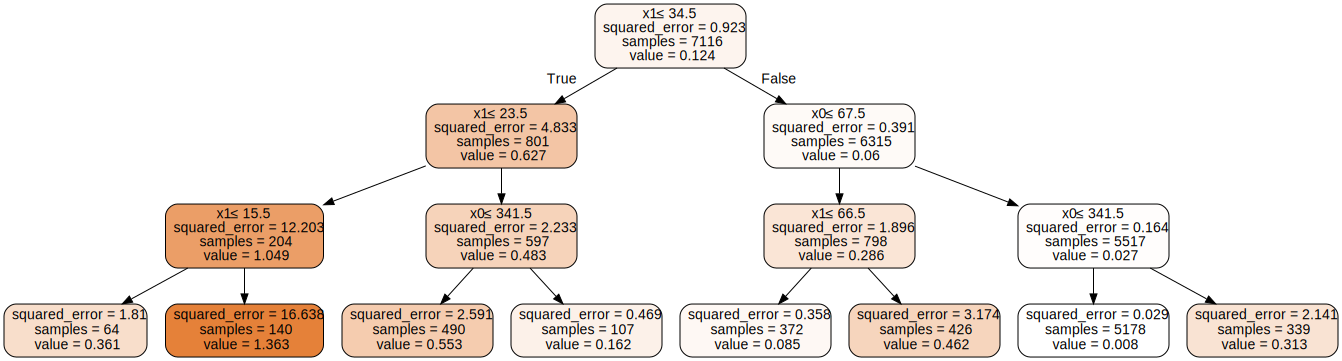

In [10]:
# Visualizing rainfall regression tree.

weather_data

dot_data = export_graphviz(snow_tree_reg, out_file=os.path.join(IMAGES_PATH, "weather_snow_model.dot"),
                           filled=True, rounded=True,
                           special_characters=True)

# Use graphviz to visualize the tree
Source.from_file(os.path.join(IMAGES_PATH, "weather_snow_model.dot"))

In [18]:
# Convert date to day of the year so our model can work with
date_one = datetime.strptime('2025-01-12', '%Y-%m-%d')
day_of_year_one = date_one.timetuple().tm_yday
date_two = datetime.strptime('2025-08-01', '%Y-%m-%d')
day_of_year_two = date_two.timetuple().tm_yday
avg_temp_one = 28
avg_temp_two = 80

# Create a DataFrame for the prediction. Consists of day of the year and average
# temp.
X_pred = pd.DataFrame([[day_of_year_one, avg_temp_one],[day_of_year_two, avg_temp_two]], columns=features)
print(X_pred)
# Predict temperature
snowfall = snow_tree_reg.predict(X_pred)
print(f'The predicted snowfall in inches for January 12 and August 1 are: {snowfall}')

   DayOfYear  TAVG
0         12    28
1        213    80
The predicted snowfall in inches for January 12 and August 1 are: [0.55285714 0.00849749]


## Part 6 - Intent: Altering Data

### Altering data in the rainfall prediciton model by changing values in the weather data data frame to see the effects on the model.


In [20]:
# Copying original data frame and adding 2 to every entry for the
# precipitation column.
altered_weather_data = weather_data.copy()
altered_weather_data['PRCP'] += .1

# Separate features and target
features = ['DayOfYear', 'TAVG']
X = altered_weather_data[features]
y = altered_weather_data['PRCP']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rain_tree_reg = DecisionTreeRegressor(max_depth=3)
rain_tree_reg.fit(X_train, y_train)

# Test the model
predictions = rain_tree_reg.predict(X_test)

# Uncomment to examine predicitons
# predictions

# Convert date to day of the year so our model can work with
date = datetime.strptime('2025-04-15', '%Y-%m-%d')
day_of_year = date.timetuple().tm_yday
avg_temp = 60

# Create a DataFrame for the prediction. Consists of day of the year and average
# temp.
X_pred = pd.DataFrame([[day_of_year, avg_temp]], columns=features)

print(X_pred)
# Predict temperature
rainfall = rain_tree_reg.predict(X_pred)
print(f'The predicted rainfall for April 15 is {rainfall[0]}')

   DayOfYear  TAVG
0        105    60
The predicted rainfall for April 15 is 0.22382053194134666


## Part 7 - Intent: Making data Inconsistent
### Altering the data frame with inconsistencies to see the effect on the models. I chose to alter a random number of entries to use celsius degrees instead of fahrenheit, which seems like a plausible incosisntency for weather data.

In [12]:
# Convert temp from fahrenheit to celsius with a 30% chance, otherwise leave alone.
def convert_random_entries_to_celsius(temp_f):
    if np.random.rand() < 0.3:  # 30% chance to convert
        return (temp_f - 32) * 5.0/9.0
    else:
        return temp_f

incosistent_weather_data = weather_data.copy()
incosistent_weather_data['TAVG'] = incosistent_weather_data['TAVG'].apply(convert_random_entries_to_celsius)

# Separate features and target
features = ['DayOfYear']
X = incosistent_weather_data[features]
y = incosistent_weather_data['TAVG']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model as before. Max Depth 3 seems like a good depth to easily visualize
# the tree and not overfit.
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

# Test the model
predictions = tree_reg.predict(X_test)

# Convert date to day of the year so our model can work with
date = datetime.strptime('2025-07-01', '%Y-%m-%d')
day_of_year = date.timetuple().tm_yday

# Create a DataFrame for the prediction
X_pred = pd.DataFrame([day_of_year], columns=features)

# Predict temperature
temperature = tree_reg.predict(X_pred)
print(f'The predicted temperature for July 1 is {temperature[0]}')

The predicted temperature for July 1 is 54.65207428847044
